In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#!pip install pybaseball
#!pip install xgboost

### Load & Review Dataframes

In [2]:
#Starting with Mariners in 2022 (mariners_2022_y)
X = pd.read_csv(
    Path('./Resources/mariners_2022_X.csv'),
    index_col=[0],
)

y = pd.read_csv(
    Path('./Resources/mariners_2022_y.csv'),
    index_col=[0],
)

In [3]:
#Review dataframe
display(X)
display(y)

,Rank,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_DET,Opp_HOU,...,Opp_NYY,Opp_OAK,Opp_PHI,Opp_SDP,Opp_TBR,Opp_TEX,Opp_TOR,Opp_WSN,D/N_D,D/N_N
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,W/L
1,1
2,1
3,0
4,0
5,0
...,...
158,0
159,0
160,1
161,1


In [4]:
#drop Rank column, keeping 3 original features, 'D/N', 'Home/Away', and 'Opp'
X = X.drop(columns=['Rank'])

In [5]:
#Review dataframe
X

,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_DET,Opp_HOU,Opp_KCR,...,Opp_NYY,Opp_OAK,Opp_PHI,Opp_SDP,Opp_TBR,Opp_TEX,Opp_TOR,Opp_WSN,D/N_D,D/N_N
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Split Data into Training and Testing Sets

In [6]:
# split data using test_train_split w/ random_state=1 and default test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [7]:
y_test.value_counts()

W/L
1      23
0      18
dtype: int64

### Normalize Data with StandardScaler

In [8]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression Model

In [11]:
# Create a LogisticRegression Model with the original data

# Instantiate the Logistic Regression Model w/ random_state = 1
model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train_scaled, y_train)

In [12]:
# Make predictions using testing data
y_pred = lr_model.predict(X_test_scaled)
# do we need training predictions if not doing a confusion matrix?


In [13]:
#Evaluation metrics
print(balanced_accuracy_score(y_test, y_pred))

0.5640096618357487


In [14]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 7, 11],
       [ 6, 17]], dtype=int64)

In [15]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  17
False Positive(FP) =  11
True Negative(TN) =  7
False Negative(FN) =  6


In [16]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.61      0.74      0.67        23

    accuracy                           0.59        41
   macro avg       0.57      0.56      0.56        41
weighted avg       0.58      0.59      0.57        41



### XGBoost aka Extreme Gradient Boosting

In [17]:
# Instantiate XGBoost Model w/ random_state = 1
model = XGBClassifier(random_state=1)

In [18]:
# Fit the model using the scaled training data
XGBModel = model.fit(X_train_scaled, y_train)

[16:13:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
# Make predictions for test data
y_pred = XGBModel.predict(X_test_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_pred]

In [20]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5121951219512195

In [21]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6, 12],
       [ 8, 15]], dtype=int64)

In [22]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  15
False Positive(FP) =  12
True Negative(TN) =  6
False Negative(FN) =  8


In [23]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38        18
           1       0.56      0.65      0.60        23

    accuracy                           0.51        41
   macro avg       0.49      0.49      0.49        41
weighted avg       0.50      0.51      0.50        41



## Model Initialization and for loop

In [24]:
# Initialize each binary classifier
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=1)
models['XGBoost'] = XGBClassifier(random_state=1)

In [25]:
# Performance Eval
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # fit the classifier
    models[key].fit(X_train_scaled, y_train)
    
    # make predictions
    predictions = models[key].predict(X_test_scaled)
    
    # calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions)
    recall[key] = recall_score(y_test, predictions)

[16:13:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Results

In [26]:
df_model = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.585366,0.607143,0.739130
XGBoost,0.512195,0.555556,0.652174


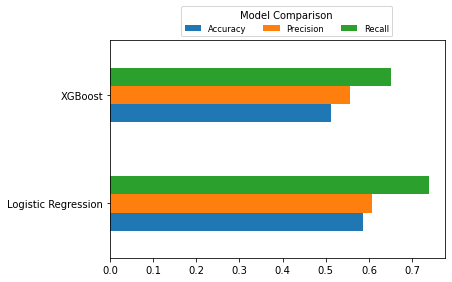

In [27]:
ax  = df_model.plot.barh()
ax.legend(
    ncol=3,
    title="Model Comparison",
    bbox_to_anchor=(.2,1),
    fontsize='small'
)

## Test Models Using List Indexing for Testing and Training Sets

In [28]:
#split into training and testing sets
X_train = X.loc[:122]
X_test = X.loc[123:]
y_train = y.loc[:122]
y_test = y.loc[123:]

In [29]:
#check testing targets for balance
y_test.value_counts()

W/L
1      24
0      16
dtype: int64

## Normalize Data Using StandardScaler

In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Logistic Regression Model

In [32]:
# Instantiate the Logistic Regression Model w/ random_state = 1
model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train_scaled, y_train)

In [33]:
# Make predictions using testing data
y_pred = lr_model.predict(X_test_scaled)

### Evaluation Metrics

In [34]:
#accuracy score
print(balanced_accuracy_score(y_test, y_pred))

0.5416666666666667


In [35]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 2, 14],
       [ 1, 23]], dtype=int64)

In [36]:
#print results of confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  23
False Positive(FP) =  14
True Negative(TN) =  2
False Negative(FN) =  1


In [37]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.62      0.96      0.75        24

    accuracy                           0.62        40
   macro avg       0.64      0.54      0.48        40
weighted avg       0.64      0.62      0.54        40



## XGBoost Model

In [38]:
# Instantiate XGBoost Model w/ random_state = 1
model = XGBClassifier(random_state=1)

In [39]:
# Fit the model using the scaled training data
XGBModel = model.fit(X_train_scaled, y_train)

[16:13:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
# Make predictions for test data
y_pred = XGBModel.predict(X_test_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_pred]

### Evaluation Metrics

In [45]:
accuracy = balanced_accuracy_score(y_test, predictions)
accuracy

0.40625

In [42]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 1, 15],
       [ 6, 18]], dtype=int64)

In [43]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  18
False Positive(FP) =  15
True Negative(TN) =  1
False Negative(FN) =  6


In [44]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.06      0.09        16
           1       0.55      0.75      0.63        24

    accuracy                           0.48        40
   macro avg       0.34      0.41      0.36        40
weighted avg       0.38      0.47      0.41        40

